# 중간고사

## ML 분류 RF, LR, DT 사용

### 
2. 해당 소스를 이용하여 ML 분류 RF, LR, DT

3. 해당 소스를 이용하여 FCNN

4. 해당 소스를 이용하여 CNN

5. 모든 소스에는 F1값 및 confusion matrix 표시

In [2]:
# 사용 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns)

df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [5]:
# 결측치 확인
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [6]:
# 결측치 제거
df = df.dropna()

In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 2. 범주형 변'를 숫자로 변환 (Label Encoding)
label_encoder = LabelEncoder()

df['buying'] = label_encoder.fit_transform(df['buying'])

df['maint'] = label_encoder.fit_transform(df['maint'])

df['lug_boot'] = label_encoder.fit_transform(df['lug_boot'])

df['safety'] = label_encoder.fit_transform(df['safety'])

df['class'] = label_encoder.fit_transform(df['class'])

df['doors'] = label_encoder.fit_transform(df['doors'])

df['persons'] = label_encoder.fit_transform(df['persons'])

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['class'] = label_encoder.fit_transform(df['class'])

df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


array([[<Axes: title={'center': 'buying'}>,
        <Axes: title={'center': 'maint'}>,
        <Axes: title={'center': 'doors'}>],
       [<Axes: title={'center': 'persons'}>,
        <Axes: title={'center': 'lug_boot'}>,
        <Axes: title={'center': 'safety'}>],
       [<Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

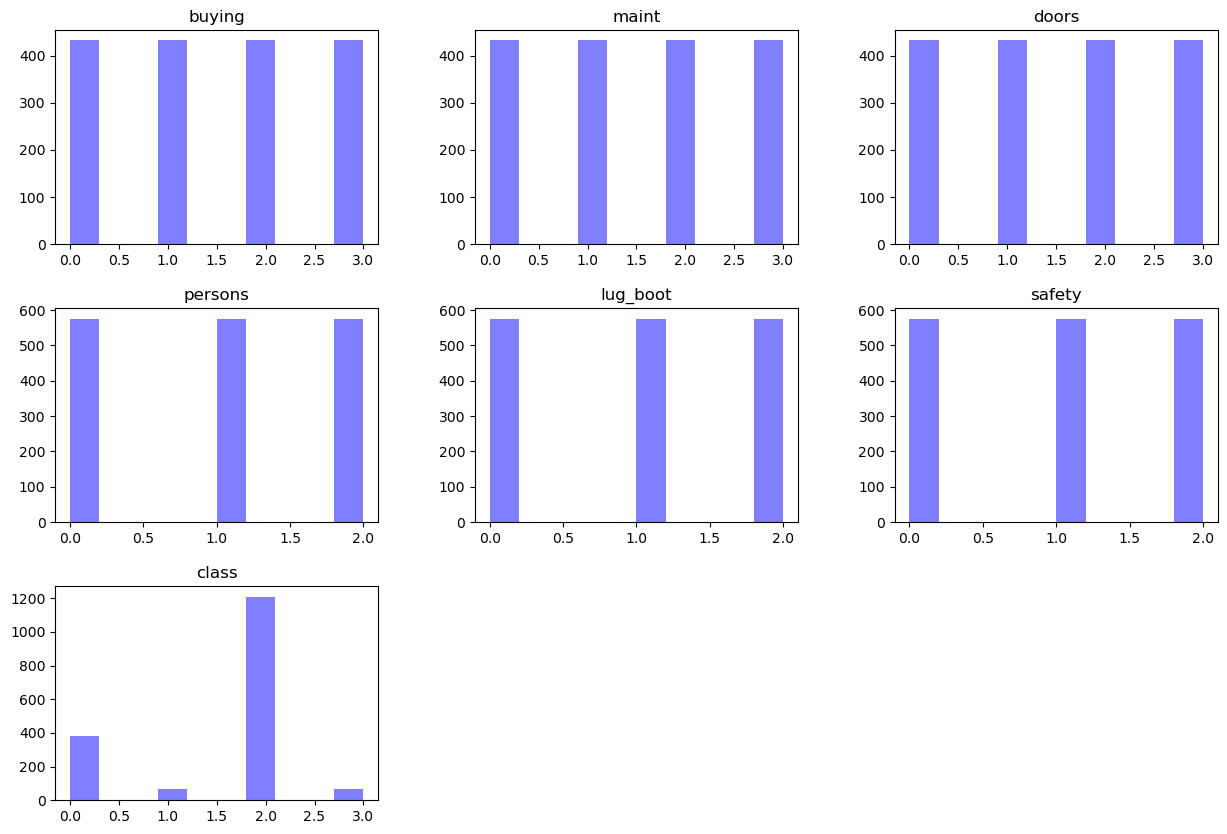

In [9]:
df.hist(figsize=(15, 10), grid=False, alpha=0.5, color='blue')

Text(0.5, 1.0, 'archive of class')

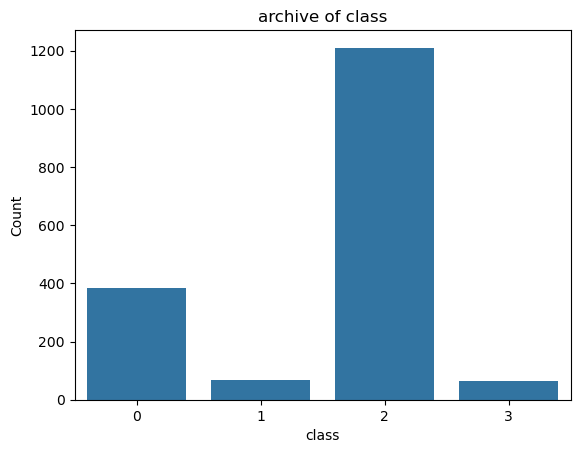

In [10]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x = "class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("archive of class")

doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64

In [12]:
df['class'].value_counts()

class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64

In [13]:
# Train Test Split

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [15]:
X = df.drop('class', axis = 1)
y = df['class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

X_train

,buying,maint,doors,persons,lug_boot,safety
787,0,1,1,0,1,2
188,3,0,2,2,0,0
1486,1,0,3,0,2,2
1110,2,2,1,0,1,1
1520,1,2,0,0,0,0
...,...,...,...,...,...,...
1666,1,1,1,2,2,2
1265,2,1,2,2,1,0
1277,2,1,3,0,0,0
1414,1,0,0,1,2,2


In [17]:
# Logistic Regression

cl_lr = LogisticRegression()
cl_lr.fit(X_train, y_train)

print('--- LR 모델점수 ---\n', '{:.5f}'.format(cl_lr.score(X_test, y_test)))

pred_lr = cl_lr.predict(X_test)

ac_score = accuracy_score(pred_lr, y_test)
cf_matrix = confusion_matrix(pred_lr, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- LR 모델점수 ---
 0.70139

--- accuracy score ---
0.70139

--- confusion matrix ---
[[ 14   3  11   2]
 [  0   0   0   0]
 [ 81  19 285   5]
 [  7   0   1   4]]


In [18]:
# Random Forest

cl_rf = RandomForestClassifier(random_state=5)
cl_rf.fit(X_train, y_train)

print('--- RF 모델점수 ---\n', '{:.5f}'.format(cl_rf.score(X_test, y_test)))

pred_rf = cl_rf.predict(X_test)

ac_score = accuracy_score(pred_rf, y_test)
cf_matrix = confusion_matrix(pred_rf, y_test)
print('\n--- accuracy score ---')
print('{:.5f}'.format(ac_score))
print('\n--- confusion matrix ---')
print(cf_matrix)

--- RF 모델점수 ---
 0.95833

--- accuracy score ---
0.95833

--- confusion matrix ---
[[ 95   5   5   0]
 [  0  16   0   0]
 [  7   0 292   0]
 [  0   1   0  11]]


In [19]:
from sklearn.tree import DecisionTreeClassifier
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.96296
[[ 94   1   6   1]
 [  3  19   0   0]
 [  5   0 292   0]
 [  0   0   0  11]]
